<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
TP Machine learning : Segmentation des clients d'un site ECOM
</h1>

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
Chargement des librairies
</h1>

In [ ]:
# Librairies standards
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from math import radians, cos, sin, asin, sqrt

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1. Description des données
</h1>

<h2 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1.1 Chargement des données
</h2>

Olist a a son actif neuf (09) bases de données, dans cette partie il est question de chargée en m"moire ces differentes base de données qui seront ensuite merger dans une seconde partie.

### a. Les clients

Cette base est relative aux identifiants et localisatioin des clients , elle contient cinq variables  et 9940 observations. Elle ne contient aucune valeur manquante et est liées aux bases **géolocalistion,commandes, article** par les clés **customer_id,customer_unique_id et customer_zip_code_prefix**

In [ ]:
data_dir = 'C:/Users/LENOVO/Desktop/to_machine_learning2/data/'
# Chargement de la base olist_customers_dataset
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Le dataset ne comporte pas de valeurs nulles.**

### b. Les données de géolocalisation

données de géolocalisation des commandes prises dans les differentes villes par les clients de Olist.  **Lien avec la base customers : la clé geolocation_zip_code_prefix**

In [ ]:
# Chargement de la base olist_geolocation_dataset
geolocation = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


NB :
* Pas de valeurs nulles;


In [ ]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### c. Les commandes clients

Cette base retrace les commandes des clients. Elle est liée à la base client par **le customer_id.**

In [ ]:
# olist_orders_dataset
orders = pd.read_csv(data_dir + "olist_orders_dataset.csv")
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### d. Les articles

In [ ]:
# Chargement de la base olist_order_items_dataset
order_items = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### e. Les paiements

In [ ]:
order_payments = pd.read_csv(data_dir + "olist_order_payments_dataset.csv")
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### f. Avis des clients (Notes - Commentaires)

In [ ]:
# Chargement de la base olist_order_reviews_dataset
order_reviews = pd.read_csv(data_dir + "olist_order_reviews_dataset.csv")
order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### g. Les produits

In [ ]:
# Chargement de la base olist_products_dataset
products = pd.read_csv(data_dir + "olist_products_dataset.csv")
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### h. Les vendeurs

Les vendeurs n'étant pas l'objet de cette analyse, le dataset correspondant (sellers) sera ici ignoré.

In [ ]:
# olist_sellers_dataset
sellers =   pd.read_csv(data_dir + "olist_sellers_dataset.csv")
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### i. Categories traduites

In [ ]:
# Chargement de la base olist_product_category_name_translation_dataset
categories_en = pd.read_csv(data_dir + "product_category_name_translation.csv")
categories_en.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
categories_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


NB :
* Les catégories traduites et les produits sont liés par la variable product_category_name.

Les vendeurs n'étant pas l'objet de cette analyse, le dataset correspondant (sellers) sera ici ignoré.

<h2 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1.2 Fusion des bases de données
</h2>

### Jointure de Produits et Catégories

Dans cette partie, nous allons merger la base de produits et leurs catégories par le biais de la clé **product_category_name** .

In [ ]:
products = pd.merge(products, categories_en,
                    how="left",
                    on="product_category_name")
products.head(6)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments


### Jointure de Commandes et clients

Nous allons merger la base des commandes et les clients par le biais des clés **order_id**.

In [ ]:
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [ ]:
# Analysons les statuts de commande
#order_items.groupby(by="order_status").sum()["order_item_id"]

**Commentaires :**

On remarque un pic anormal autour de Novembre / Décembre 2017 (ce qui peut être un pic correspondant aux cadeaux de fin d'année) ainsi qu'un plateau sans commandes entre Octobre 2016 et Janvier 2017.

### Jointure avec la base paiements

Nous allons joindre la base paiements avec la base avec la base order_items. La base oder_items est la jointure de **commandes et clients.**  
Pour le dataset des paiements, vous allons d'abord créer de nouvelles variables à savoir :
* Le nombre de moyens de paiement différents utilisés sur la commande.
* Le nombre d'échéances totales de la commande.

In [ ]:
# Creation des variables en regroupant les donnees selon order_id
group_payments = order_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})
# Fusion avec order_items
order_items = pd.merge(order_items, group_payments,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,3.0


**Commentaires :**  
On remarque que 80% des paiements environ sont réalisés en carte bancaire. Nous ne prendrons donc pas en considération cette variable dans nos explorations.

### Jointure de la base des avis clients à la base oder_items

nous allons également créer une nouvelle variable qui indiquera seulement si oui ou non la commande a été notée (True or False) et une seconde variable qui reprendra la note attribuée.

In [ ]:
# Création des variables en regroupant selon order_id
group_reviews = order_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean"})
# Fusion
order_items = pd.merge(order_items, group_reviews,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "review_id": "is_reviewed"})
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,2.0,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,3.0,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,2.0,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,3.0,1.0,5.0


In [ ]:
# Creation de la variable qui indique si la commande est notée ou non
order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1,
                                      True, False)

### Jointure sur le fichier clients

In [ ]:
order_items = pd.merge(order_items, customers,
                       how="left",
                       on="customer_id")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

### Jointure avec la base des produits

In [ ]:
data = pd.merge(order_items, products,
               how="left",
               on="product_id")
data.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
2. Feature Engineering
</h1>

### OBJECTIFS
Le but de cette partie est de constuire un dataset qui aggrège des caratéristique de nos clients, en terme de préférence d'article, fréquence de commande, volume de commande, durée d'activitées, apport en chiffre d'affaire pour l'entreprise.

#### Mode opérationnel
Pour ce faire nous avons:
- Regrouper les catégories qui se rassemblaient car nous avions près de 70 catégories dans notre dataset
- On a consataté que plus de 99% des clients ont passés des commandes dans au plus une catégories, raison pour laquelle en **terme de préference d'achat** nous avons choisi **la catégories majoritaire**. Afin de prendre en compte les clients ayant effectuer des achats ailleurs, nous affecter  à la catégories le **ratio** de commandes faite dans la catégorie majopritaire par rapport aux commandes totales.
- Plus de 90% de nos clients passe la commande d'un seul produit par article, en **terme de volume de nombre de produit par commande de la catégories majoritaire**, nous affecteons le **ratio** du volume de commande destinée à cette catégorie divisé le volume totale de commande du client
- Pour évaluer la fréquence d'activité ou encore la durée qui existe entre les commandes des clients dans la base , on aurait pu avoir la durée moyenne entre deux commandes, mais étant que la pluspart des clients n'ont passées qu'une seule ca ne sera pas logique, il serait judicieux de s'interesser plutot à la **recence de la commande par rapport à la dernière commande de la base**
- Nous allons également évaluer le retard de livraison des commandes , c'est à dire l'écart entre la date réelle de livraison du produit et la date estimée lors de la commande , ceci pourrait permettre à Olist d'ameliore ce service. Pour ce faire nous avons créer une variable qui êrmet d'évaluer la durée exacte de livraison du produit. Au finale on doit agreger la difference par la moyenne

- **Pour pouvoir calculer ces délais , nous allons nous restreindre aux commandes ayant été effectivements livrées**
-  Afin d'identifier la recente , le volume de commande et le volume monétaire des commandes des clients, nous allons utliliser le **RFM** .

   - RÉCENCE (R) : jours depuis le dernier achat
   - FRÉQUENCE (F) : Nombre total d'achats
   - VALEUR MONETAIRE (M) : montant total dépensé par ce client.
      
      **NB**
   - On aurait pu calculer le RFM pour chaque catégories, mais étant données que le majeure partie des commandes est faites dans une seule catégorie de produit, le RFM global de chaque individus est repreentatifs de la catégories majoritaire choisie plus haut


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

Nous allons commencer par supprimer les variables non utile à notre analyse tel que:
 - "product_weight_g",
 - "product_length_cm",
 - "product_height_cm",
 - "product_width_cm"
 - seller_id
 - shipping_limit_date
 - order_approved_at
 - order_delivered_carrier_date
 - order_estimated_delivery_date

In [ ]:
## Liste des variables à supprimer
drop_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm", "product_category_name",
                    "seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date"
            ]

data.drop(drop_list, axis=1, inplace=True)
data = data.rename(columns={"product_category_name_english":
                                    "product_category_name"})
data.shape

(112650, 22)

#### Suppression des commandes en double

In [ ]:
## Supprimer les commandes en double
#data.drop_duplicates(subset=['order_id', 'customer_id'], keep="first", inplace=True)

#### Restriction de la base aux commandes ayant au moins été facturé
Par la suite nous allons maintenir uniquement les commandes qui ont été facturé au moins, en d'autres termes retirer celle en cours de transaction,
celle annulé et les commandes non disponibles, car afin d'assurer la fiabilité de notre segmentation nous avon besoin de travailler avec les clients réels et les produits effectivement écoulés de Olist.

In [ ]:
###
##data["order_status"].unique()

In [ ]:
data=data[data["order_status"] == "delivered"]


In [ ]:
data.shape


(110197, 22)

In [ ]:
data_reserv=data.copy()
#data= data_reserv.copy()

#####  Création d'une variable contenant le délai le livraison de chaque commande
Le delais de livraison nous permettra à l'entreprise de trouver d'étudier les attitudes des individus selon le temps de livraison de leur article.

In [ ]:
# Modifier les types de données en datetime pour les colonnes temporelles.

data["order_purchase_timestamp"] = data["order_purchase_timestamp"].astype('datetime64[ns]')
data["order_delivered_customer_date"] = data["order_delivered_customer_date"].astype('datetime64[ns]')

# Création d'une variable contenant le délai de livraison de chaque commande
data["delivery_delta_days"] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days


# Création d'une variable contenant le délai le livraison de chaque commande
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp )\
                              .dt.round('1d').dt.days



In [ ]:
data["delivery_delta_days"].describe()


count    110189.000000
mean         12.431214
std           9.449405
min           1.000000
25%           7.000000
50%          10.000000
75%          16.000000
max         210.000000
Name: delivery_delta_days, dtype: float64

On constate une valeur maximale de durée de livraison de 210 jours , pour une moyenn de 12, donc on peut pressentir l'existence des valeurs abbérantes.

In [ ]:
## Définir les valeurs abbérantes du temps de livraisons
Q1 = data['delivery_delta_days'].quantile(0.25)
Q3 = data['delivery_delta_days'].quantile(0.75)
IQR = Q3 - Q1

## Boite à moustache
borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR

outliers = data[(data['delivery_delta_days'] < borne_min) | (data['delivery_delta_days'] > borne_max)]

## Pourcentag de valeurs abbérrantes
outliers_percentage = (len(outliers) / len(data)) * 100
print(f"Pourcentage de valeurs aberrantes: {outliers_percentage:.2f}%")


Pourcentage de valeurs aberrantes: 4.76%


Puisque le poucentage de valeurs abberantes est faibles, nous allons les imputer par la médiane

In [ ]:
## Imputation des valeurs abbérantes par la médiane
median_value = data['delivery_delta_days'].median()
data['delivery_delta_days'] = np.where(
    (data['delivery_delta_days'] < borne_min) | (data['delivery_delta_days'] > borne_max),
    median_value,
    data['delivery_delta_days']
)



### Création de catégories plus globales

**Note :**  
Nous allons créer une nouvelle variable pour les categories de produits.  En effet, le jeu de données compte plus de 70 catégories différentes (ce qui peut poser problème pour un encodage lors des preprocessing). Nous allons donc devoir regrouper plusieurs de ces catégorie, pour celà nous allons nous baser les catégories principales des sites de ventes en ligne en 2024.


In [ ]:
data['product_category'] = np.where((data['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data['product_category_name'].str.contains("grocer|food|drink")==True),
                                     'groceries_food_drink',
                           np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True),
                                     'technology',
                           np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True),
                                                                                          'home_furniture',
                           np.where((data['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))
# Suppression de la variable product_category_name column
#data.drop("product_category_name", axis=1, inplace=True)

In [ ]:
data_reserv1=data.copy()
#data=data_reserv1.copy()

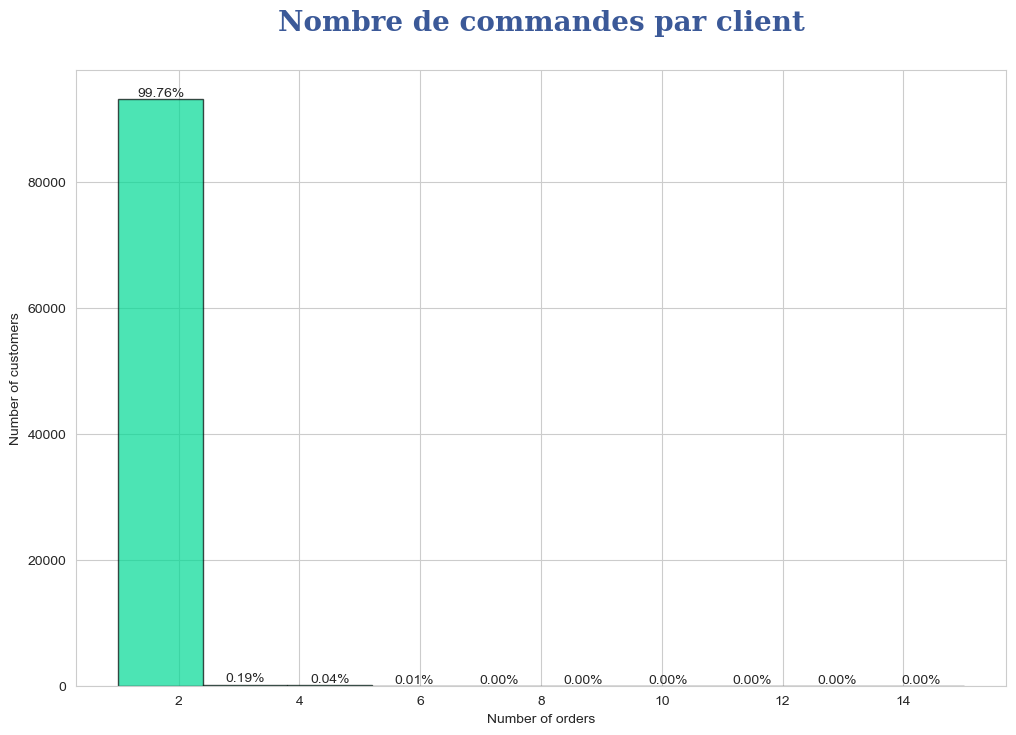

In [ ]:

# Répartition du nombre de commandes moyen par client
sns.set_style("whitegrid")
font_title = {
    "family": "serif",
    "color":  "#3b5998",
    "weight": "bold",
    "size": 20
}

# Calculer le nombre de commandes par client
orders_per_customer = data.groupby("customer_unique_id").agg({"order_id": "nunique"}).reset_index()

# Créer la figure
fig = plt.figure(figsize=(12, 8))

# Tracer l'histogramme et récupérer les valeurs de chaque bin
n, bins, patches = plt.hist(orders_per_customer['order_id'],
                            edgecolor="black",
                            color="#00d994", alpha=0.7)

# Calculer les pourcentages
total = n.sum()
percentages = (n / total) * 100

# Ajouter des pourcentages aux barres
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height,
             f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel("Number of orders")
plt.ylabel("Number of customers")
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)

# Afficher le graphique
plt.show()


**Commentaires**
- La majeure partie des clients soit **99.76%** n'ont passé qu'une seule commande
- Visiblement Pas de valeurs abbérantes

**Implication**
- Il sera donc compliqué d'établir un classement de leur catégorie produit préférée.
- Pour aggrerger les données des clients par la suite , nous allons attribuer à chaque individus la catégorie dans laquelle il fait le plus d'achat car le nombre commande passée dans les autres catégories est très faibe.
- **Afin d'évaluer les clients qui font des achats dans d'autres catégories**, nous allons attribuer à la catégorie  le ratio du nombre de produits commandé par catégorie sur le nombre de produits total acheté par le client,



### Ratio du nombre de commande par catégories

In [ ]:
### Creattion du dataset qui donne le nombre de produit commandé par chaque cient par catégories
categories_customers = data.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)

### Calcul du total des achat fait par un client
categories_customers["total_items"] = categories_customers.sum(axis=1)
categories_customers.head()


product_category,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


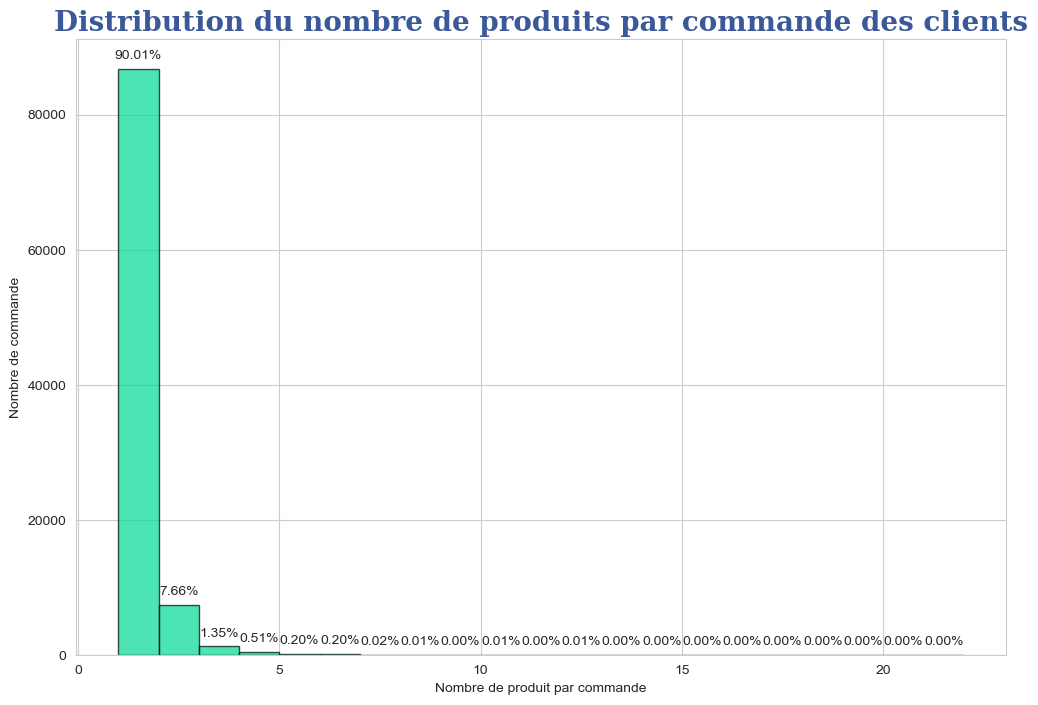

In [ ]:
# Calculer le nombre de produits commandés par commande pour chaque client
products_per_order = data.groupby(['customer_unique_id', 'order_id']).agg({'order_item_id': 'count'}).reset_index()

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer l'histogramme
n, bins, patches = ax.hist(products_per_order['order_item_id'],
                           bins=range(1, products_per_order['order_item_id'].max() + 2),
                           edgecolor="black",
                           color="#00d994", alpha=0.7)

# Calculer les pourcentages
total = n.sum()
percentages = (n / total) * 100

# Ajouter des pourcentages aux barres
for i in range(len(patches)):
    height = patches[i].get_height()
    ax.annotate(f'{percentages[i]:.2f}%',
                xy=(patches[i].get_x() + patches[i].get_width() / 2, height),
                xytext=(0, 5),  # 5 points verticaux de décalage
                textcoords="offset points",
                ha='center', va='bottom')

    # Ajouter des labels et un titre
ax.set_xlabel("Nombre de produit par commande")
ax.set_ylabel("Nombre de commande")
ax.set_title("Distribution du nombre de produits par commande des clients",
          fontdict=font_title)

# Afficher le graphique
plt.show()


**Commentaires**
- La majeure partie des clients soit **90.06%** passent la commande d'un seul produit par commande
- Visiblement Pas de valeurs abbérantes

**Implication**
- Il sera donc compliqué d'établir un classement de leur catégorie produit préférée.
- Pour aggrerger les données des clients par la suite , nous allons attribuer à chaque individus la catégorie dans laquelle il fait le plus d'achat car le nombre commande passée dans les autres catégories est très faibe.
- **Afin d'évaluer les clients qui font des achats dans d'autres catégories**, nous allons attribuer à la catégorie  le ratio du nombre de produits commandé par catégorie sur le nombre de produits total acheté par le client,

### Ratio  et moyenne du nombre de commande par article

In [ ]:
# ratio du nombre de produits par catégorie sur le nbre de produits total acheté
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])
categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Nombre moyen d'articles par commande pour chaque client
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})
products_per_order=products_per_order.rename(columns={"order_item_id": "nb_article_par_commande"})

products_per_order.head()

,nb_article_par_commande
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,1.0
0004aac84e0df4da2b147fca70cf8255,1.0


#### Nombre de jours écoulés entre la première et la dernière commande

Cette variable n

#### Créationde la variable du délais exacte de livraison
Création d'une variable contenant le délai le livraison de chaque commande
Le delais de livraison nous permettra à l'entreprise de trouver d'étudier les attitudes des individus selon le temps de livraison de leur article.

In [ ]:
# Modifier les types de données en datetime pour les colonnes temporelles.
data["order_purchase_timestamp"] = data["order_purchase_timestamp"].astype('datetime64[ns]')
data["order_delivered_customer_date"] = data["order_delivered_customer_date"].astype('datetime64[ns]')

# Création d'une variable contenant le délai de livraison de chaque commande
data["delivery_delta_days"] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

# Création d'une variable contenant le délai le livraison de chaque commande
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp )\
                              .dt.round('1d').dt.days

data["delivery_delta_days"].describe()

count    110189.000000
mean         12.431214
std           9.449405
min           1.000000
25%           7.000000
50%          10.000000
75%          16.000000
max         210.000000
Name: delivery_delta_days, dtype: float64

On constate une valeur maximale de durée de livraison de 210 jours , pour une moyenne de 12, donc on peut pressentir l'existence des valeurs abbérantes.


In [ ]:
## Définir les valeurs abbérantes du temps de livraisons
Q1 = data['delivery_delta_days'].quantile(0.25)
Q3 = data['delivery_delta_days'].quantile(0.75)
IQR = Q3 - Q1

## Boite à moustache
borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR

outliers = data[(data['delivery_delta_days'] < borne_min) | (data['delivery_delta_days'] > borne_max)]

## Pourcentag de valeurs abbérrantes
outliers_percentage = (len(outliers) / len(data)) * 100
print(f"Pourcentage de valeurs aberrantes: {outliers_percentage:.2f}%")

Pourcentage de valeurs aberrantes: 4.76%


In [ ]:
## Imputation des valeurs abbérantes par la médiane
median_value = data['delivery_delta_days'].median()
data['delivery_delta_days'] = np.where(
    (data['delivery_delta_days'] < borne_min) | (data['delivery_delta_days'] > borne_max),
    median_value,
    data['delivery_delta_days']
)


In [ ]:
data_reserv3= data.copy()


#### Ecart de livraison

In [ ]:
# Convertir les colonnes de dates en type datetime
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype('datetime64[ns]')
data['order_estimated_delivery_date'] = data['order_estimated_delivery_date'].astype('datetime64[ns]')
data['order_delivered_customer_date'] = data['order_delivered_customer_date'].astype('datetime64[ns]')


# Calculer la différence de temps entre les colonnes de dates
data['ecart_delivery_delay'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days
data['ecart_delivery_delay'].describe()


count    110189.000000
mean        -12.029041
std          10.158194
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: ecart_delivery_delay, dtype: float64

In [ ]:
# Calculer la moyenne de l'écart pour chaque client par commande
average_delay_per_order = data.groupby(['customer_unique_id', 'order_id'])['ecart_delivery_delay'].mean().reset_index()

# Calculer la moyenne de l'écart pour chaque client
average_delay_per_customer = average_delay_per_order.groupby('customer_unique_id')['ecart_delivery_delay'].mean()

average_delay_per_customer=pd.DataFrame(average_delay_per_customer)
average_delay_per_customer.head()

,ecart_delivery_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,-5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-5.0
0000f46a3911fa3c0805444483337064,-2.0
0000f6ccb0745a6a4b88665a16c9f078,-12.0
0004aac84e0df4da2b147fca70cf8255,-8.0


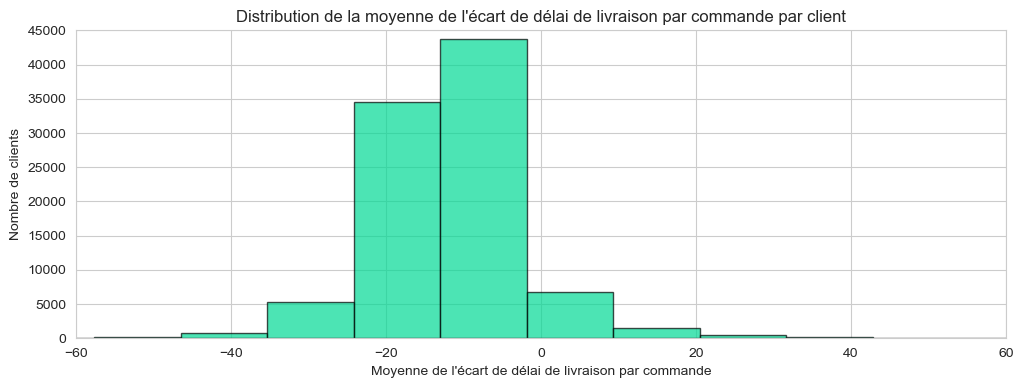

In [ ]:
# Afficher la distribution de la moyenne d'écart avec une échelle ajustée
fig = plt.figure(figsize=(12, 4))
plt.hist(average_delay_per_customer, bins=30, edgecolor="black", color="#00d994", alpha=0.7)
plt.xlabel("Moyenne de l'écart de délai de livraison par commande")
plt.ylabel("Nombre de clients")
plt.title("Distribution de la moyenne de l'écart de délai de livraison par commande par client")

# Définir les limites de l'axe des ordonnées (y-axis)
plt.ylim(0, 45000)  # Ajustez ces valeurs selon votre besoin
plt.xlim(-60, 60)  # Ajustez ces valeurs selon votre besoin

plt.show()

### Creation du RFM

In [ ]:
data_rfm= data.copy()

L'analyse RFM (Récence, Fréquence, Monétaire) est une technique qui permet de catégoriser les clients suivant leur récence d'activités, leur volume total d'achat et la valeur monétaire qu'ils apportes par le bias de leurs achats.
Il permet d'identifier les clients les plus susceptibles de répondre aux promotions et également aux futurs services de personnalisation.

- RÉCENCE (R) : jours depuis le dernier achat
- FRÉQUENCE (F) : Nombre total d'achats
- VALEUR MONETAIRE (M) : montant total dépensé par ce client.
Nous créerons ces 3 attributs client pour chaque client.

**NB**
- On aurait pu calculer le RFM pour chaque catégories, mais étant données que le majeure partie des commandes est faites dans une seule catégorie de produit, le RFM global de chaque individus est repreentatifs de la catégories majoritaire choisie plus haut

##### RECENCE
Pour calculer la récence, nous devons choisir une date à partir de laquelle nous évaluons le nombre de jours du dernier achat du client.

#### Etape
- Définir une date de reference: nous allons utiliser comme reférence la date la plus recente de notre dataset
- Calculer la durée moyenne mise entre les achtas d'un client

In [ ]:
## Définir la refenrence des dates
now_reference = data_rfm['order_purchase_timestamp'].max()

# Grouper par client et determiner la date du dernier achat toute catégories condonfu
recency_df = data_rfm.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency_df.columns = ['customer_unique_id','LastPurshaceDate']

## Calcul de la recence
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now_reference - x).days)
### Supprimer la variable
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,536
3,0000f6ccb0745a6a4b88665a16c9f078,320
4,0004aac84e0df4da2b147fca70cf8255,287


##### FREQUENCE
La fréquence nous aide à savoir combien de fois un client a acheté chez nous. Pour ce faire, nous devons vérifier combien de factures sont enregistrées par le même client.

- Calcul de la fréquence des achats toute catérogies confondues

In [ ]:
#calculate frequency of purchases
frequency_df = data_rfm.groupby(by=['customer_unique_id'], as_index=False)['order_id'].count()
frequency_df.columns = ['customer_unique_id','Frequency']
frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


##### Valeur monétaire des biens  
L'attribut monétaire répond à la question : combien d'argent le client a-t-il dépensé au fil du temps ?

- Pour ce faire, nous allons d’abord créer une nouvelle colonne coût total pour avoir le prix total par facture.



Pourcentages de valeurs aberrantes pour 'price' par catégorie :
flowers_gifts: 8.82%
other: 8.30%
home_furniture: 6.58%
health_beauty: 11.25%
technology: 6.98%
books_cds_media: 4.61%
fashion_clothing_accessories: 8.08%
sport: 6.58%
groceries_food_drink: 10.81%
toys_baby: 8.78%

Pourcentages de valeurs aberrantes pour 'freight_value' par catégorie :
flowers_gifts: 11.81%
other: 9.88%
home_furniture: 10.41%
health_beauty: 7.74%
technology: 10.20%
books_cds_media: 3.65%
fashion_clothing_accessories: 11.72%
sport: 8.65%
groceries_food_drink: 3.19%
toys_baby: 10.14%


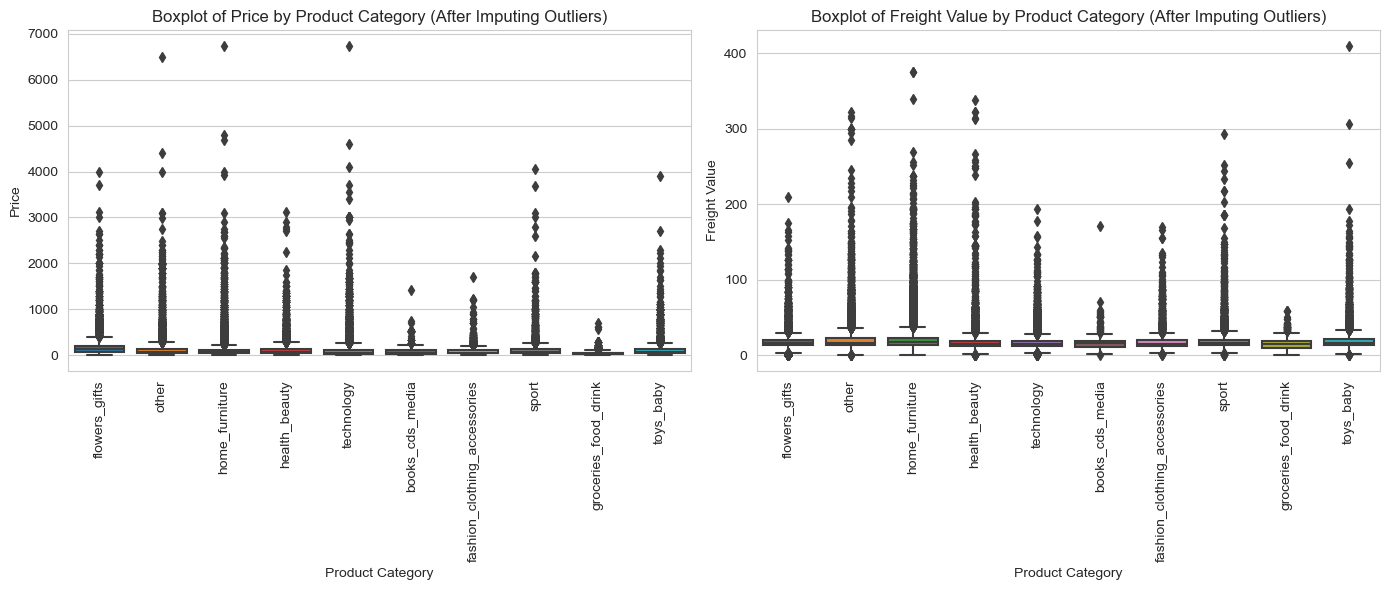

In [ ]:
# Fonction pour détecter les valeurs aberrantes et les imputer par la médiane pour une catégorie donnée
def detect_and_impute_outliers_by_category(data, category_col, value_col):
    # Initialiser les listes pour stocker les pourcentages de valeurs aberrantes
    percentages = []

    # Parcourir chaque catégorie unique
    for category in data[category_col].unique():
        # Filtrer les données pour la catégorie courante
        category_data = data[data[category_col] == category]

        # Calculer les quartiles et l'IQR pour la catégorie courante
        Q1 = category_data[value_col].quantile(0.25)
        Q3 = category_data[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les limites pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Détecter les valeurs aberrantes
        outliers = category_data[(category_data[value_col] < lower_bound) | (category_data[value_col] > upper_bound)]

        # Calculer le pourcentage de valeurs aberrantes
        percentage_outliers = len(outliers) / len(category_data) * 100
        percentages.append((category, percentage_outliers))



    return percentages

# Calculer et imputer les valeurs aberrantes pour 'price' et 'freight_value' par catégorie de produit
price_percentages = detect_and_impute_outliers_by_category(data_rfm, 'product_category', 'price')
freight_percentages = detect_and_impute_outliers_by_category(data_rfm, 'product_category', 'freight_value')

# Afficher les pourcentages de valeurs aberrantes
print("Pourcentages de valeurs aberrantes pour 'price' par catégorie :")
for category, percentage in price_percentages:
    print(f"{category}: {percentage:.2f}%")

print("\nPourcentages de valeurs aberrantes pour 'freight_value' par catégorie :")
for category, percentage in freight_percentages:
    print(f"{category}: {percentage:.2f}%")

# Visualiser les boxplots par catégorie
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=data_rfm, x='product_category', y='price', ax=ax[0])
ax[0].set_title('Boxplot of Price by Product Category (After Imputing Outliers)')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=data_rfm, x='product_category', y='freight_value', ax=ax[1])
ax[1].set_title('Boxplot of Freight Value by Product Category (After Imputing Outliers)')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Freight Value')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**Commentaire** :
Nous n'allons pas les imprimer si les supprimer car on considère qu'effectivement le prix de certains articles sont élévés que d'autres, d'autant plus qu'on veut étudier l'apport monetaire d'un individu

In [ ]:
#create column total cost
data_rfm['TotalCost'] = data_rfm['price'] + data_rfm['freight_value']

monetary_df = data_rfm.groupby('customer_unique_id').TotalCost.sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'monetary']
monetary_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


### Score RFM et segmenation avec le modèle RFM
Le moyen le plus simple de créer des segments de clients à partir du modèle RFM consiste à utiliser les quartiles. Nous attribuons un score de 1 à 4 à la récence, à la fréquence et à la valeur monétaire. Quatre est la meilleure/la plus haute valeur, et un est la plus basse/la pire valeur. Un score RFM final est calculé simplement en combinant les numéros de score RFM individuels.

**Remarque** : Les quintiles (score de 1 à 5) offrent une meilleure granularité, au cas où l'entreprise en aurait besoin, mais il sera plus difficile de créer des segments puisque nous aurons 555 combinaisons possibles. Nous utiliserons donc des quartiles.

In [ ]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='customer_unique_id')

## Merger avec les données monétaire des clients
rfm_df = temp_df.merge(monetary_df,on='customer_unique_id')

#use CustomerID as index
rfm_df.set_index('customer_unique_id',inplace=True)
#check the head
rfm_df.head()


,Recency,Frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89


#### RFM Quartile

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,monetary
0.25,113.0,1.0,63.01
0.50,218.0,1.0,107.78
0.75,345.0,1.0,182.51


#### Creation du score  RFM
Nous allons créer deux classes de segmentation car une récence élevée est mauvaise, tandis qu'une fréquence élevée et une valeur monétaire sont bonnes.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))
rfm_segmentation.head()

,Recency,Frequency,monetary,R_Quartile,F_Quartile,M_Quartile
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,3
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,3,1,1
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4


Maintenant que nous avons le score de chaque client, nous pouvons représenter notre segmentation client. Tout d’abord, nous devons combiner les scores (R_Quartile, F_Quartile, M_Quartile) ensemble.

In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,3,1,1,311
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214


#### Meilleurs clients en terme de RFM

In [ ]:
rfm_segmentation.sort_values('RFMScore', ascending=False).head(10)

,Recency,Frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_unique_id,,,,,,,
20ae758fb6688386d9d1540f63d380e0,76,2,329.83,4,4,4,444
0a3d4f596bd69fa0b5f599c4b66b9dc5,82,2,194.13,4,4,4,444
3af90f255e824d1d53b3584a4e89ad58,110,3,224.68,4,4,4,444
b83249f64d1c5d719ce04e1bc5775547,11,2,237.60,4,4,4,444
b7b68a8bb6ca48aefdd5790e04cda817,76,2,248.52,4,4,4,444
b7b162291adff744d6f3c6450557ffee,33,3,519.24,4,4,4,444
3b36c9136759dd1599f755c82917d0c6,54,2,371.94,4,4,4,444
b7a035bbaa15467c17b1a94adc820913,107,2,1164.62,4,4,4,444
b7737cd1c12adf6a0bc2de497ce2935d,20,2,235.45,4,4,4,444


### Appreciation des clients positif ou négatif

In [ ]:
# Calculer la moyenne des 'review_score' pour chaque 'customer_id'
average_review_score = data.groupby('customer_unique_id')['review_score'].mean().reset_index()

# Créer la nouvelle variable 'customer_appreciation'
average_review_score['customer_appreciation'] = np.where(average_review_score['review_score'] >= 3, 1, 0)
average_review_score= pd.DataFrame(average_review_score)

average_review_score.head()

,customer_unique_id,review_score,customer_appreciation
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1
2,0000f46a3911fa3c0805444483337064,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,1


In [ ]:
data_cli=data.copy()


## Création du dataset clients

Ici il est question de constitué la base des client sous la quelle on pourra faire la segmentation, pour ce faire nous allons:
- Aggreger les dépenses des clients par la somme de leur dépenses totales
- Aggreger mes dépenses de livraison par  le prix total que les clients paient pout les livraisons
- Aggreger le nombre sequentiel des payements d'un clients par la moyenne
- Prendre en compre la note moyenne que le clients donne
- Ajouter les ratio calculer plus haut
- Ajouter le RFM

In [ ]:
data_cli = data_cli.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                 "nb_payment_sequential": "mean",
                  "sum_payment_installments": "mean",
                  "review_score": "mean"})

#,
                  #"sale_month": lambda x:x.value_counts().index[0]


In [ ]:
# On renomme les variables
data_cli = data_cli.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score"})
#,
                            #"sale_month": "favorite_sale_month"

In [ ]:
# Fusion avec les variables crées précedemment
data_cli = pd.merge(data_cli, categories_customers,
                how="left",
                on="customer_unique_id")

In [ ]:
data_cli = pd.merge(data_cli, products_per_order,
                how="left",
                on="customer_unique_id")\
        .rename(columns={"order_item_id": "mean_nb_items"})

In [ ]:
data_cli = pd.merge(data_cli, average_delay_per_customer,
                how="left",
                on="customer_unique_id")


In [ ]:
data_cli = pd.merge(data_cli, average_review_score,
                how="left",
                on="customer_unique_id")
data_cli.head(5)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,home_furniture,other,sport,technology,toys_baby,total_items,nb_article_par_commande,ecart_delivery_delay,review_score,customer_appreciation
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-5.0,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-5.0,4.0,1
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-2.0,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-12.0,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-8.0,5.0,1


In [ ]:
data_cli = pd.merge(data_cli, rfm_segmentation,
                how="left",
                on="customer_unique_id")
data_cli.head(5)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,ecart_delivery_delay,review_score,customer_appreciation,Recency,Frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,0.0,0.0,0.0,...,-5.0,5.0,1,111,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,0.0,0.0,0.0,...,-5.0,4.0,1,114,1,27.19,3,1,1,311
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,0.0,0.0,0.0,...,-2.0,3.0,1,536,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,0.0,0.0,0.0,...,-12.0,4.0,1,320,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,0.0,0.0,0.0,...,-8.0,5.0,1,287,1,196.89,2,1,4,214


In [ ]:
# Calcul du ratio fret / total commande
data_cli["freight_ratio"] = round(data_cli["total_freight"] / (data_cli["total_spend"] + data_cli["total_freight"]),2)
# calcul du prix moyen par commande
data_cli["mean_price_order"] = round(data_cli["total_spend"] / data_cli["nb_orders"],2)
data_cli["total_spend"] = (data_cli["total_spend"] + data_cli["total_freight"])
data_cli.drop("total_freight", axis=1, inplace=True)

In [ ]:
# Ajout des données de localisation
#customers.drop("customer_id", axis=1, inplace=True)
#
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
data_cli = pd.merge(data_cli, customers_info,
                how="left",
                on="customer_unique_id")

In [ ]:
data_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   mean_review_score             92755 non-null  float64
 6   books_cds_media               93358 non-null  float64
 7   fashion_clothing_accessories  93358 non-null  float64
 8   flowers_gifts                 93358 non-null  float64
 9   groceries_food_drink          93358 non-null  float64
 10  health_beauty                 93358 non-null  float64
 11  home_furniture                93358 non-null  float64
 12  other                         93358 non-null  float64
 13  s

In [ ]:
data_ivy= data_cli.copy()

In [ ]:
data_cli.head()

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,...,R_Quartile,F_Quartile,M_Quartile,RFMScore,freight_ratio,mean_price_order,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,0.0,0.0,0.0,0.0,...,4,1,3,413,0.08,129.90,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,0.0,0.0,0.0,0.0,...,3,1,1,311,0.30,18.90,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,0.0,0.0,0.0,0.0,...,1,1,2,112,0.20,69.00,9b3932a6253894a02c1df9d19004239f,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,0.0,0.0,0.0,0.0,...,2,1,1,211,0.40,25.99,914991f0c02ef0843c0e7010c819d642,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,0.0,0.0,0.0,0.0,...,2,1,4,214,0.09,180.00,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP


In [ ]:
data_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   mean_review_score             92755 non-null  float64
 6   books_cds_media               93358 non-null  float64
 7   fashion_clothing_accessories  93358 non-null  float64
 8   flowers_gifts                 93358 non-null  float64
 9   groceries_food_drink          93358 non-null  float64
 10  health_beauty                 93358 non-null  float64
 11  home_furniture                93358 non-null  float64
 12  other                         93358 non-null  float64
 13  s

In [ ]:
columns_to_drop = [
    'customer_zip_code_prefix', 'M_Quartile', 'F_Quartile',
    'R_Quartile', 'monetary', 'Frequency',
    'Recency','customer_id','mean_review_score', 'total_items'

]
data_cli.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   books_cds_media               93358 non-null  float64
 6   fashion_clothing_accessories  93358 non-null  float64
 7   flowers_gifts                 93358 non-null  float64
 8   groceries_food_drink          93358 non-null  float64
 9   health_beauty                 93358 non-null  float64
 10  home_furniture                93358 non-null  float64
 11  other                         93358 non-null  float64
 12  sport                         93358 non-null  float64
 13  t

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
3. Cleaning du dataset client
</h1>

La base client ainsi obtenu, nous allons faire quelques analyse dessus afin de l'épurer

In [ ]:
data_cleaned=data_cli.copy()

In [ ]:
data_cleaned.head(5)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   books_cds_media               93358 non-null  float64
 6   fashion_clothing_accessories  93358 non-null  float64
 7   flowers_gifts                 93358 non-null  float64
 8   groceries_food_drink          93358 non-null  float64
 9   health_beauty                 93358 non-null  float64
 10  home_furniture                93358 non-null  float64
 11  other                         93358 non-null  float64
 12  sport                         93358 non-null  float64
 13  t

**Note :**

2 variables contiennent des valeurs nulles. Nous allons Imputer par le mode.

##### Imputation par le mode

In [ ]:
# Recherche des variables à imputer
var_impute = data_cleaned.isnull().sum()
var_impute = list(var_impute[var_impute.values > 0].index)
for f in var_impute:
    data_cleaned[f] = data_cleaned[f].fillna(data_cleaned[f].mode()[0])
    print(f, data_cleaned[f].mode()[0])
data_cleaned.describe()

mean_payment_sequential 1.0
mean_payment_installments 1.0
ecart_delivery_delay -14.0
review_score 5.0


,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,nb_article_par_commande,ecart_delivery_delay,review_score,customer_appreciation,freight_ratio,mean_price_order
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,1.033420,165.168210,1.043872,2.965951,0.009085,0.034082,0.094412,0.009681,0.121495,0.300037,0.133696,0.077026,0.152034,0.068452,1.139531,-11.848457,4.158806,0.866128,0.208141,137.508262
std,0.209097,226.292101,0.364435,2.717719,0.094527,0.180035,0.290952,0.097170,0.325329,0.455846,0.338181,0.265228,0.357663,0.251017,0.527075,10.138391,1.278290,0.340516,0.124892,209.860281
min,1.000000,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-147.000000,1.000000,0.000000,0.000000,0.850000
25%,1.000000,63.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-17.000000,4.000000,1.000000,0.120000,46.000000
50%,1.000000,107.780000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-12.000000,5.000000,1.000000,0.180000,86.990000
75%,1.000000,182.510000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.000000,5.000000,1.000000,0.270000,149.900000
max,15.000000,13664.080000,26.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,188.000000,5.000000,1.000000,0.960000,13440.000000


**Note:**
Une commande est chiffrée à plus de 13 000 dollars.

In [ ]:
# Vérification de la commande à plus de 13000 dollars
data_cleaned[data_cleaned["mean_price_order"] == data_cleaned["mean_price_order"].max()]


,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,...,toys_baby,nb_article_par_commande,ecart_delivery_delay,review_score,customer_appreciation,RFMScore,freight_ratio,mean_price_order,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,-6.0,1.0,0,244,0.02,13440.0,rio de janeiro,RJ


**Note :**
Cette commande contient 8 articles technologiques pour un montant de 13 000 dollars. C'est atypique certes, mais ce n'est pas pour autant une donnée abérrante. Nous la conservons donc.


In [ ]:
#la dispersion des montants moyen de commandes en fonction du nombre d'articles
#fig = plt.figure(figsize=(12, 8))
#sns.scatterplot(data=data_cleaned, y="mean_price_order", x="mean_nb_items",
                #color="#00d994", alpha=0.7)
#plt.title(f"Répartition des prix moyen de commandes en fonction du nombre d'articles\n",
          #fontdict=font_title, fontsize=16)
#plt.show()

**Note :**
Une commande de plus de 20 articles est affichée pour une somme de prêt de 0

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93358 non-null  float64
 4   mean_payment_installments     93358 non-null  float64
 5   books_cds_media               93358 non-null  float64
 6   fashion_clothing_accessories  93358 non-null  float64
 7   flowers_gifts                 93358 non-null  float64
 8   groceries_food_drink          93358 non-null  float64
 9   health_beauty                 93358 non-null  float64
 10  home_furniture                93358 non-null  float64
 11  other                         93358 non-null  float64
 12  sport                         93358 non-null  float64
 13  t

In [ ]:
# Verification de la commande de plus de 20 articles
#data_cleaned[data_cleaned["mean_nb_items"] > 20]


Note : Cette fois encore, c'est une valeur atypique mais pas abérrante.

##### Analyse des Etats

In [ ]:
data_cleaned["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

**Note :**
Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia pour modifier les codes états par leur nom.



In [ ]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
tables = pd.read_html(wiki_url)
states_table = tables[3].set_index("Code")
states_table.head()
data_cleaned = pd.merge(data_cleaned.reset_index(), states_table[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")


In [ ]:
data_cleaned.drop("customer_state", axis=1, inplace=True)

data_cleaned = data_cleaned.rename(columns={"Flag and name": "customer_state"})

In [ ]:
data1=data_cleaned.copy()

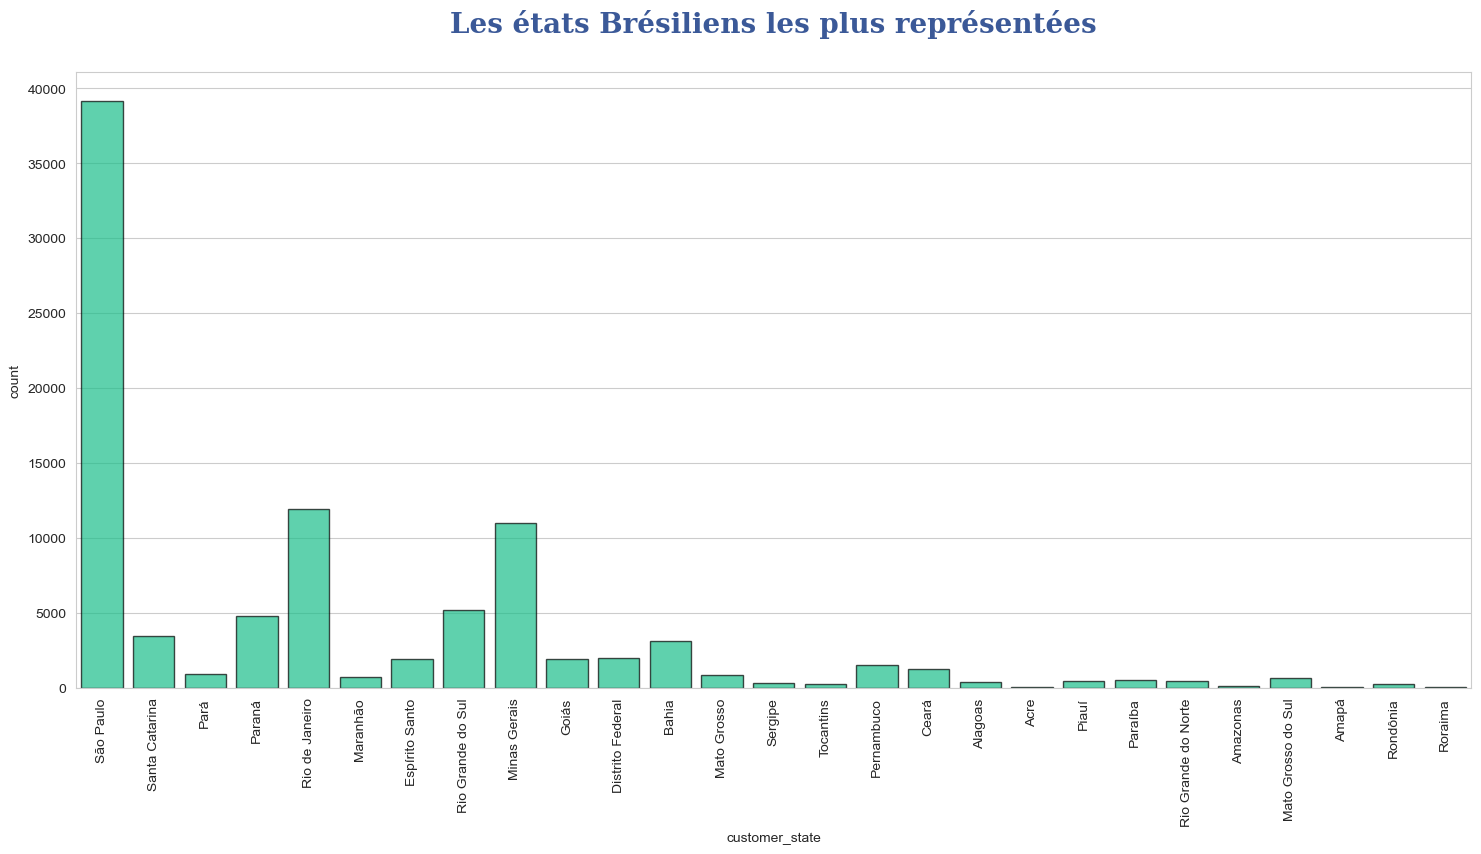

In [ ]:
# Repartition des Etats brésiliens
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data_cleaned, x="customer_state",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data_cleaned["customer_state"].nunique()),
           data_cleaned["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées\n",
          fontdict=font_title)
plt.show()

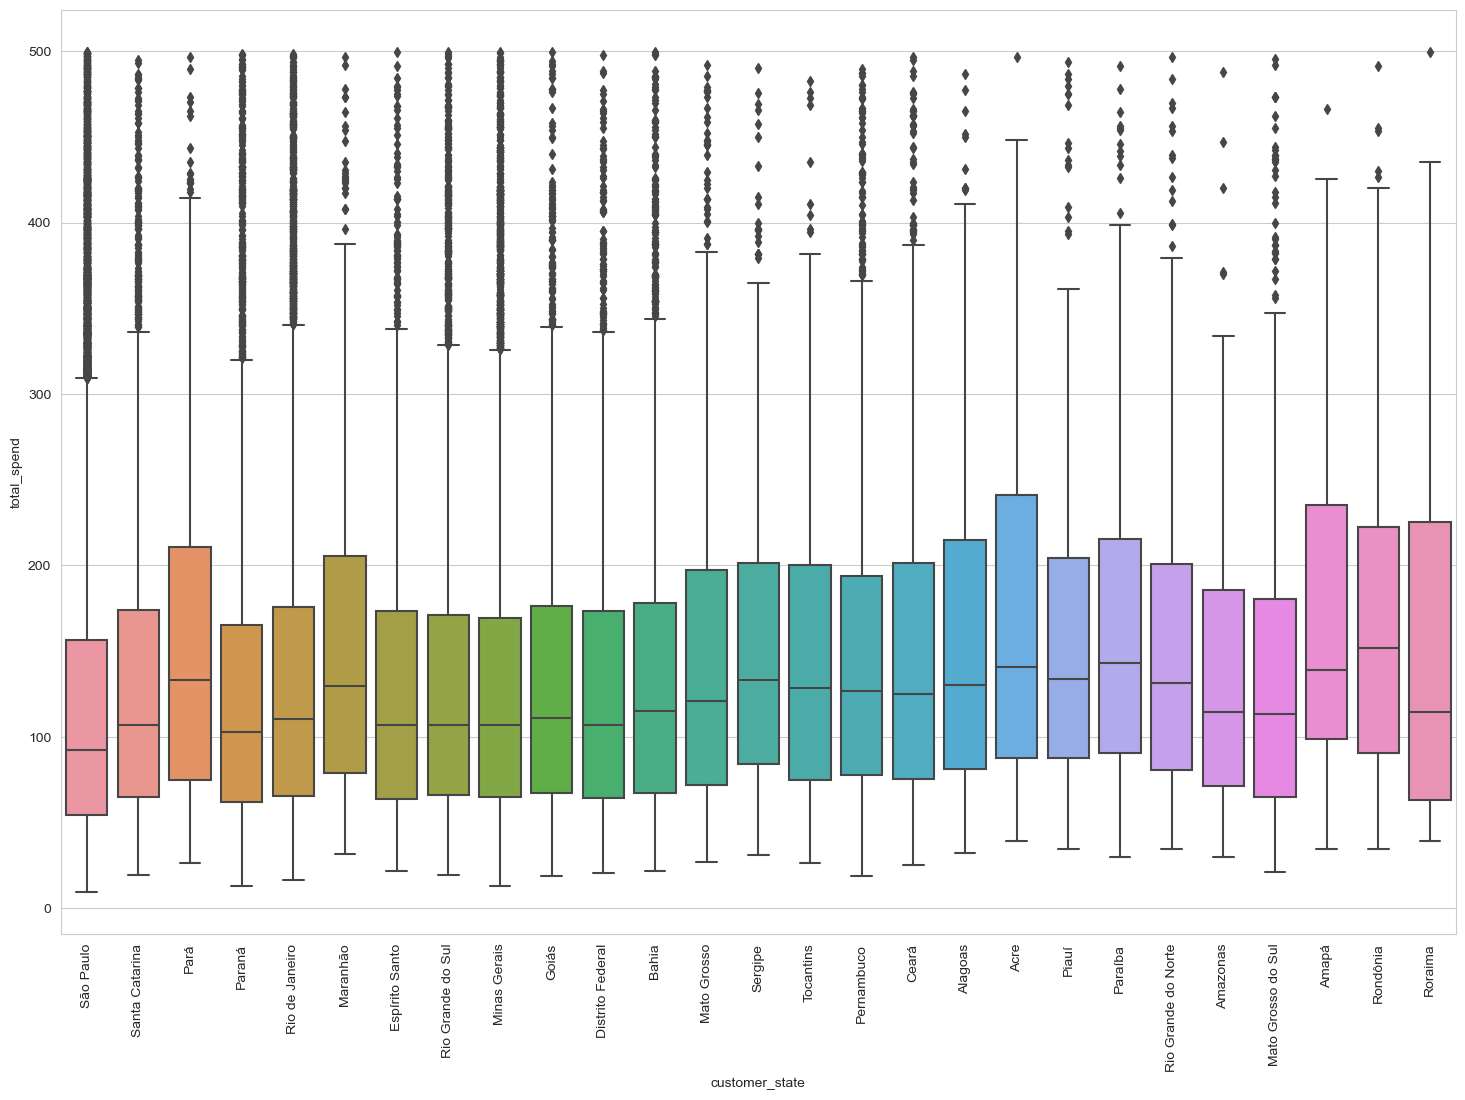

In [ ]:
# Boxplots des dépenses totales par Etat
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="customer_state", y="total_spend",
            data=data_cleaned[data_cleaned["total_spend"]<500])
plt.xticks(rotation=90)
plt.show()

Note :

On voit dans ces boxplots que l'état du client a un impact faible sur les variances et médianes des dépenses sur le site.
Afin d'utiliser une variable de localisation encodable sans impact négatif sur nos modélisation, nous allons calculer la distance Haversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist


In [ ]:
state_location = geolocation.groupby("geolocation_state")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
state_location = pd.merge(states_table[["Flag and name"]].reset_index(),
                          state_location,
                          right_on="geolocation_state",
                          left_on="Code",
                          how="left")
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

In [ ]:
# localisation de Olist
olist_lat = -25.43045
olist_lon = -49.29207
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles

    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])

    # Formule Haversine
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d

In [ ]:
# Calcul de la distance Haversine entre centre state et Olist office
state_location['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y)
                              for x, y in zip(state_location.geolocation_lat,
                                              state_location.geolocation_lng)]

In [ ]:
data_cleaned = pd.merge(data_cleaned, state_location[["Flag and name", "harvesine_distance"]],
         how="left",
         left_on="customer_state",
         right_on="Flag and name")
data_cleaned.drop("index", axis=1, inplace=True)
data_cleaned.set_index("customer_unique_id", inplace=True)
data_cleaned.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,...,ecart_delivery_delay,review_score,customer_appreciation,RFMScore,freight_ratio,mean_price_order,customer_city,customer_state,Flag and name,harvesine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-5.0,5.0,1,413,0.08,129.90,cajamar,São Paulo,São Paulo,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-5.0,4.0,1,311,0.30,18.90,osasco,São Paulo,São Paulo,209.713834
0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,3.0,1,112,0.20,69.00,sao jose,Santa Catarina,Santa Catarina,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,4.0,1,211,0.40,25.99,belem,Pará,Pará,1574.231129
0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.0,5.0,1,214,0.09,180.00,sorocaba,São Paulo,São Paulo,209.713834


#### Analyse des corrélations

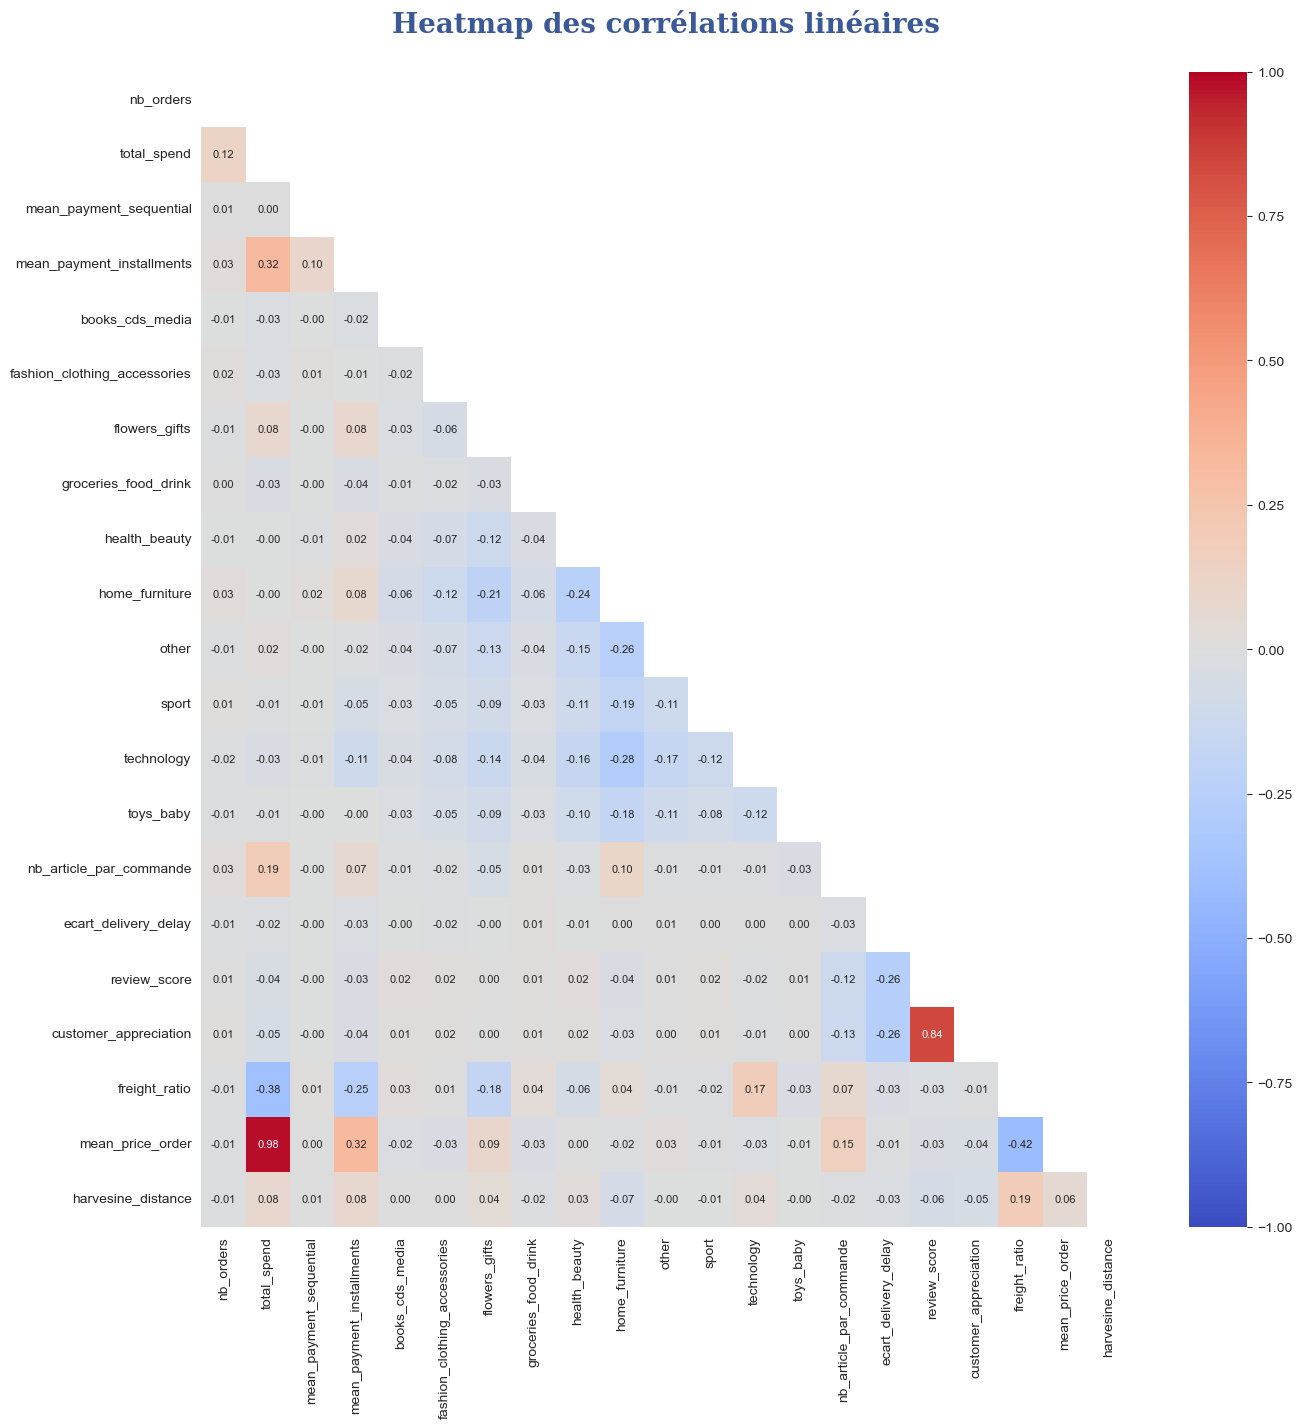

In [ ]:
# Sélection des colonnes quantitatives
quantitative_data = data_cleaned.select_dtypes(include=[np.number])

corr = quantitative_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8},
                 mask=mask,
                 center=0,
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n",
          fontdict=font_title)
plt.show()

**Note :**
On remarque que le prix total est très fortement corrélé au prix moyen par commande (idem pour le nombre d'articles moyen et le nombre d'articles total). Cela est dû au fait que la majorité des clients n'ont commandé qu'une seule fois.

NB:Cette variable sera donc moins corrélée au fil du temps.


<AxesSubplot:>

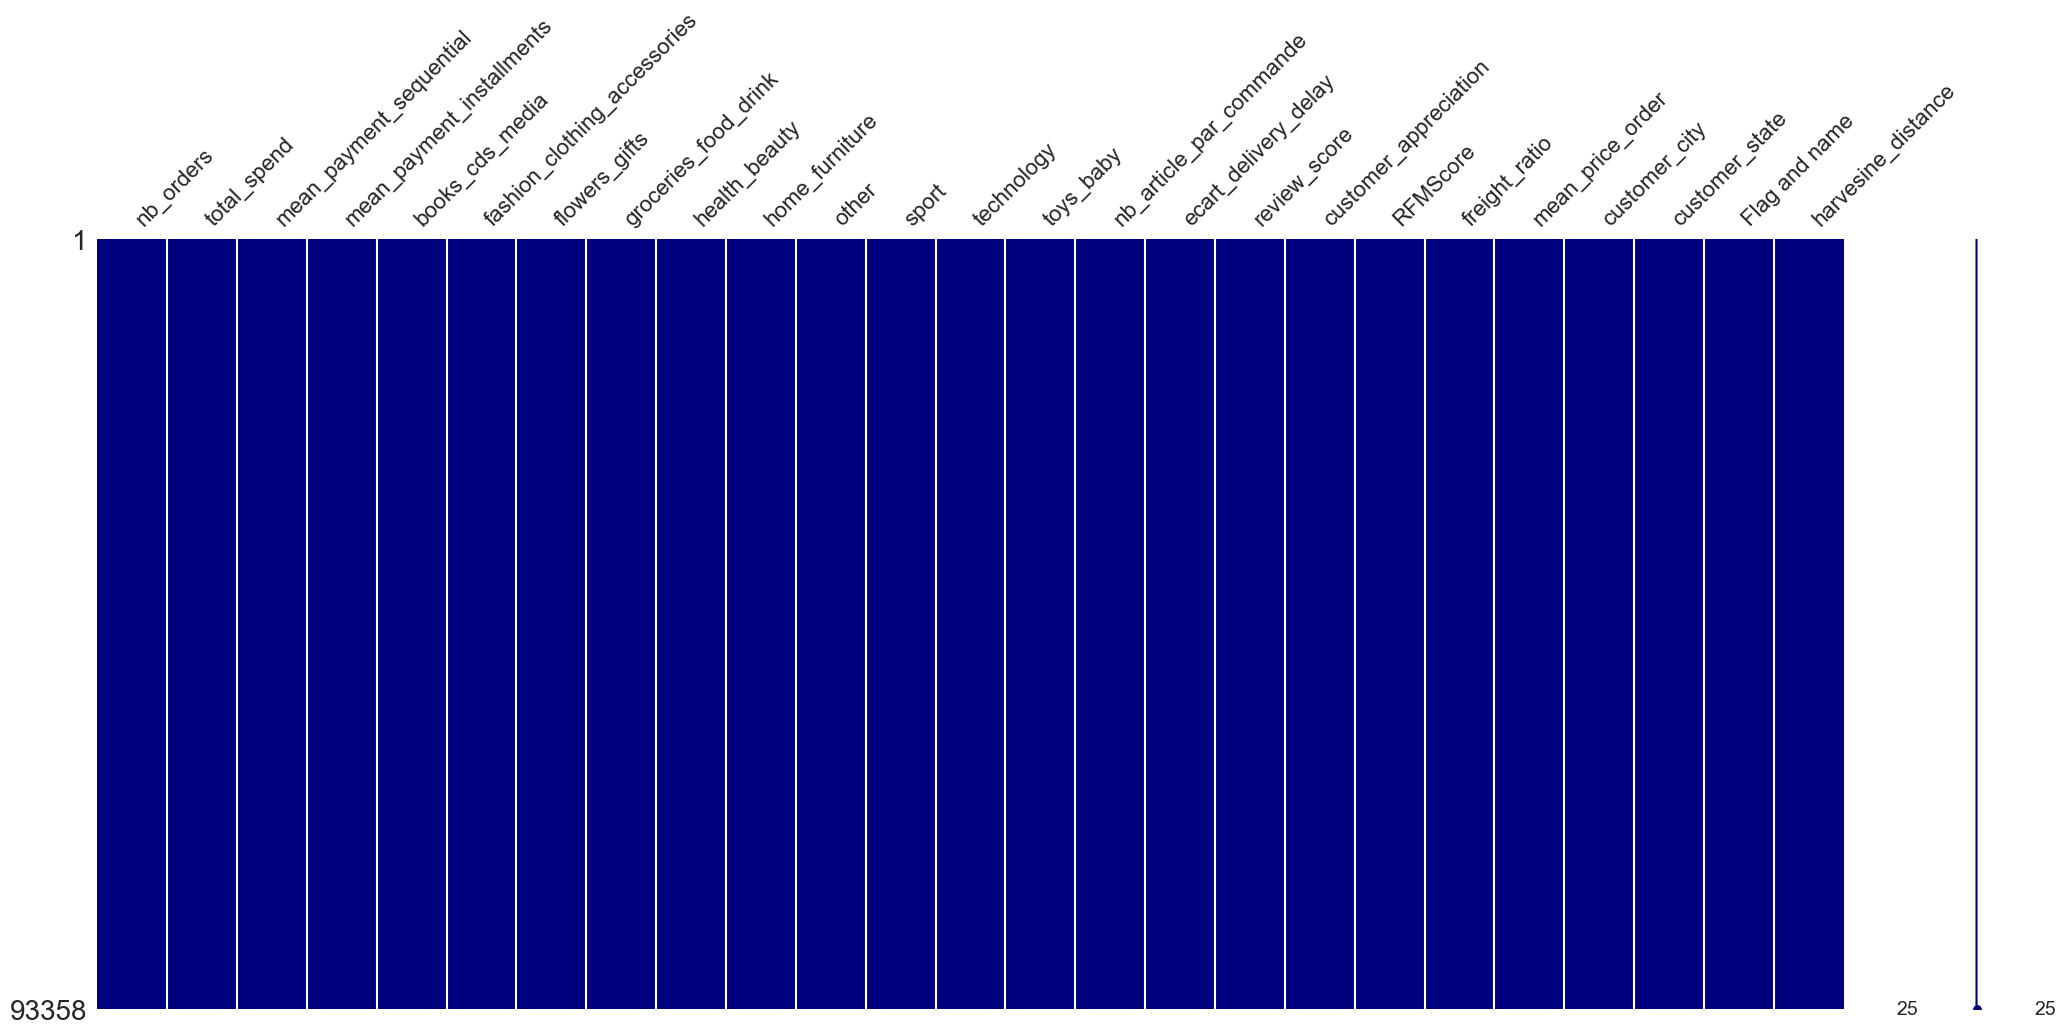

In [ ]:
msno.matrix(data_cleaned, color=(0,0,0.5))

#### Aucune valeurs manquantes dans la base

### Exportation de la base finale pour classification non-supervisée

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nb_orders                     93358 non-null  int64  
 1   total_spend                   93358 non-null  float64
 2   mean_payment_sequential       93358 non-null  float64
 3   mean_payment_installments     93358 non-null  float64
 4   books_cds_media               93358 non-null  float64
 5   fashion_clothing_accessories  93358 non-null  float64
 6   flowers_gifts                 93358 non-null  float64
 7   groceries_food_drink          93358 non-null  float64
 8   health_beauty                 93358 non-null  float64
 9   home_furniture                93358 non-null  float64
 10  other                         93358 non-null  float64
 11  sport                         93358 non-null  float64
 12  technol

In [ ]:
data_cleaned.to_csv("olist_base_finale.csv")

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
4. Statistiques descriptives
</h1>


Dans cette partie, nous allons faire quelques representations graphique afin de mieux appreccier la clientèle

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
4.1 Statistiques Univariés
</h1>


### Distribution des RFMSCORE

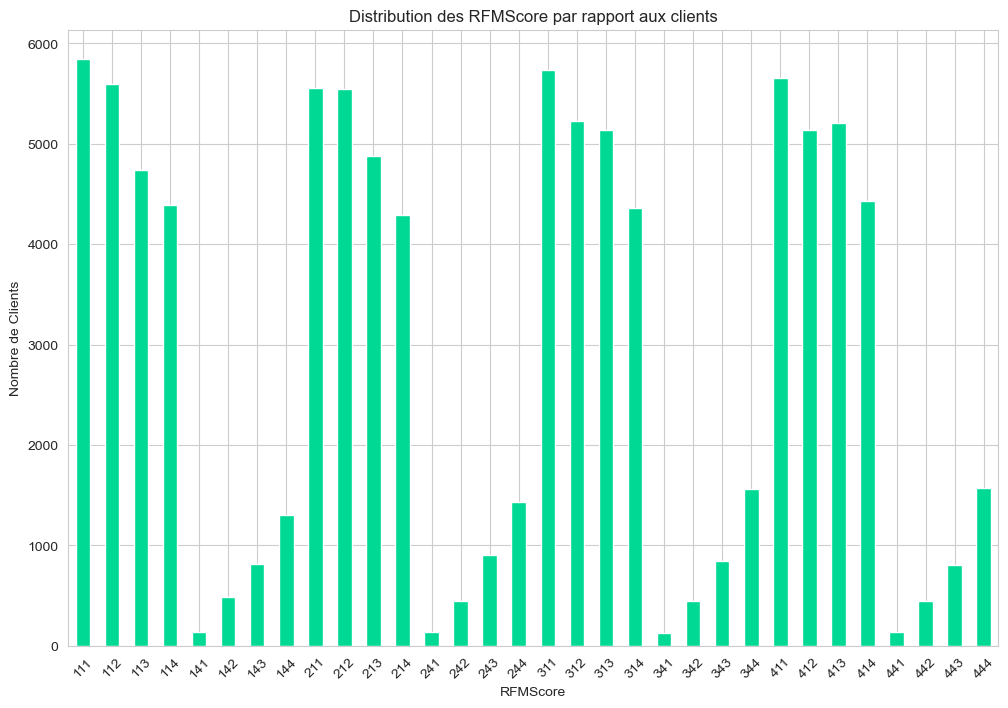

In [ ]:
rfm_distribution = data_cleaned['RFMScore'].value_counts().sort_index()

# Tracer les histogrammes de la distribution des RFMScore par rapport aux clients
plt.figure(figsize=(12, 8))
rfm_distribution.plot(kind='bar', color='#00d994')
plt.title('Distribution des RFMScore par rapport aux clients')
plt.xlabel('RFMScore')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.show()

### Distribution des appreciation des clients

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


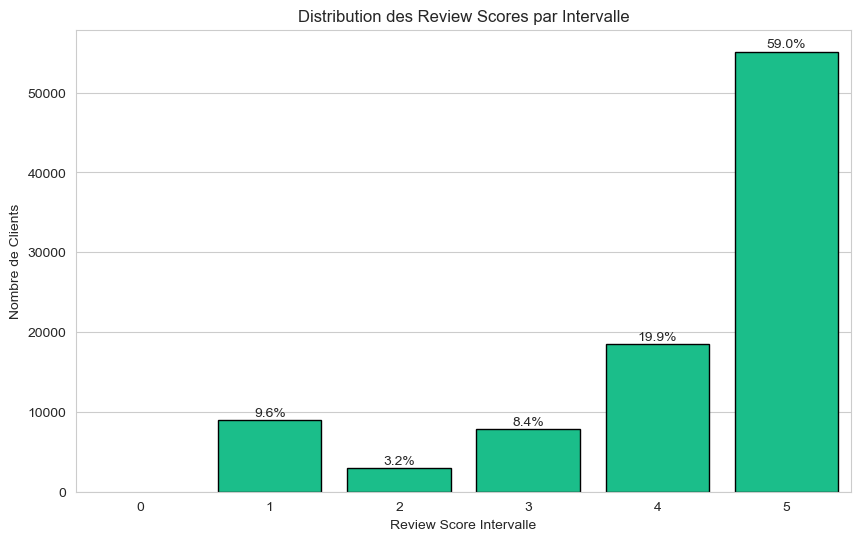

In [ ]:
# Classer les review_score par intervalle de longueur 1
data_cleaned['review_score_interval'] = pd.cut(data_cleaned['review_score'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=['0', '1', '2', '3', '4', '5'])

# Calculer les pourcentages pour chaque intervalle
review_score_counts = data_cleaned['review_score_interval'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data_cleaned, x='review_score_interval', color="#00d994", edgecolor="black")

# Ajouter les pourcentages au-dessus des barres
total = len(data_cleaned)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution des Review Scores par Intervalle')
plt.xlabel('Review Score Intervalle')
plt.ylabel('Nombre de Clients')
plt.show()

**Commentaire**
- Plus de la moitié des clients ont une apprecaition preque parfaite des produits
- Mais 9.6% n'a pas une bonne appreciation, ce qui n'est pas à négliger

#### Repartition de la quantité  de commande par catégorie de produits

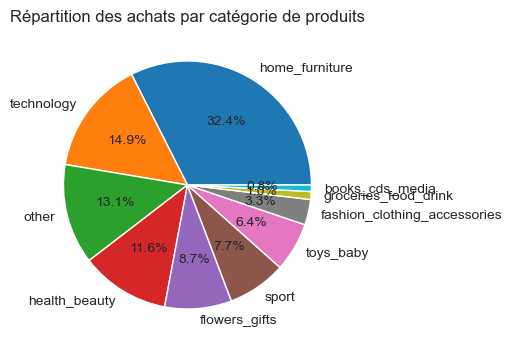

In [ ]:
plt.figure(figsize=(4, 6))
data['product_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des achats par catégorie de produits')
plt.ylabel('')
plt.show()

**Commentaire**: Les clients ont tendances à faire plus d'achats des fournitures domestiques, suivies des produits technologiques  et font moins d'achats des livres, nourriture et boissons et vêtements

#### Repartition du volume en terme de prix  de commande par catégorie de produits

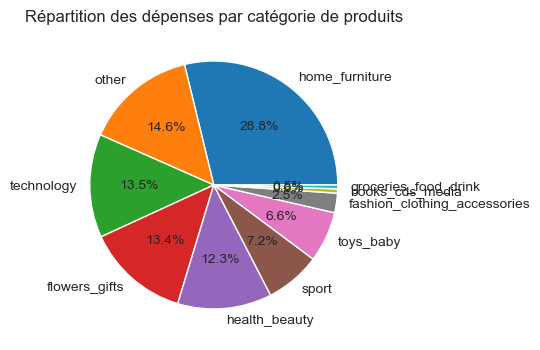

In [ ]:
# Calculer le total des dépenses par catégorie de produits
total_spend_by_category = data.groupby('product_category')['price'].sum().sort_values(ascending=False)

# Créer un diagramme circulaire
plt.figure(figsize=(4, 6))
total_spend_by_category.plot.pie(autopct='%1.1f%%')
plt.title('Répartition des dépenses par catégorie de produits')
plt.ylabel('')
plt.show()

**Commentaire**: En valeur, la plus grande dépense provient  d'achats des fournitures domestiques, suivies des autres catégories de produits et ensuite des  produits technologiques  , cependant on constate  moins de dépense pour  l'achats des livres, nourriture et boissons et vêtements

In [ ]:
#### Evolution du nombre de commandes passées par jour sur le site E-Commerce

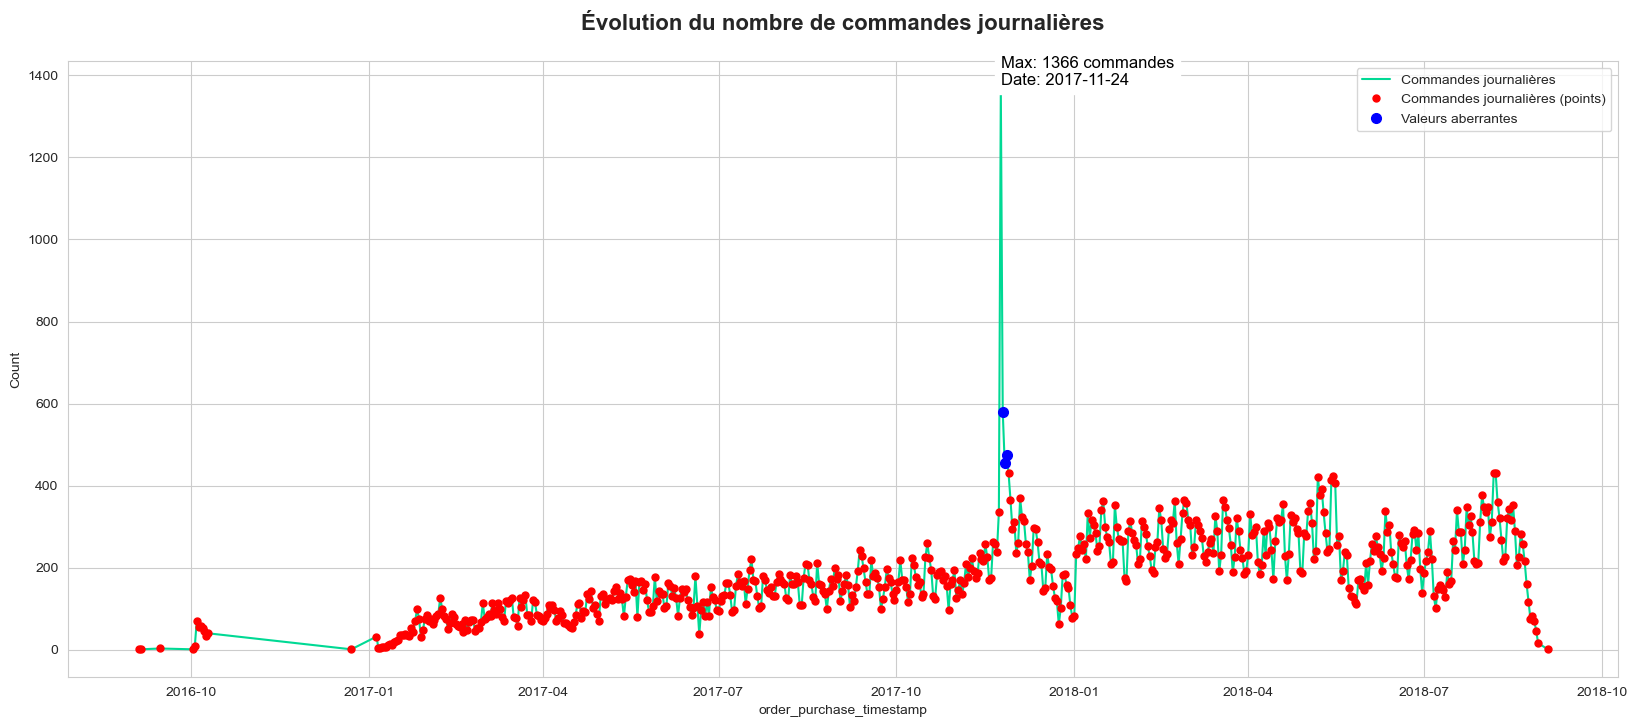

In [ ]:
# Grouper les données par date et compter les commandes
orders_per_day = order_items.groupby(order_items["order_purchase_timestamp"]
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]

# Détection des valeurs aberrantes
Q1 = orders_per_day.quantile(0.25)
Q3 = orders_per_day.quantile(0.75)
IQR = Q3 - Q1

outliers = orders_per_day[(orders_per_day < (Q1 - 1.5 * IQR)) | (orders_per_day > (Q3 + 1.5 * IQR))]

# Identifier la date de la fréquence maximale
max_date = orders_per_day.idxmax()
max_value = orders_per_day.max()

# Plot des données
fig, ax = plt.subplots(figsize=(20, 8))
orders_per_day.plot(color="#00d994", label='Commandes journalières', ax=ax)  # Tracé continu

# Ajout des points par dessus la courbe continue
ax.plot(orders_per_day.index, orders_per_day, 'ro', label='Commandes journalières (points)', markersize=5)  # Tracé point par point en rouge

# Mettre en évidence les valeurs aberrantes en bleu
ax.plot(outliers.index, outliers, 'bo', label='Valeurs aberrantes', markersize=7)  # Utilisation de 'bo' pour les outliers en bleu

# Annotation de la date avec la fréquence maximale
ax.annotate(f'Max: {max_value} commandes\nDate: {max_date}',
            xy=(max_date, max_value),
            xytext=(max_date, max_value + 10),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='black', backgroundcolor='white')

# Labels et titre
ax.set_ylabel("Count")
plt.title("Évolution du nombre de commandes journalières\n", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.legend()

# Afficher le plot
plt.show()

**Commentaire**
- La tendance du nombre de commande par jours est croissante , cependant elle fluctue beaucoup autour le le moyenne
- On remarque aussi un pic de commande le 11 decembre 2017,surement dûe aux achats pour les fête de fins d'années

#### Repartition des commandes par mois

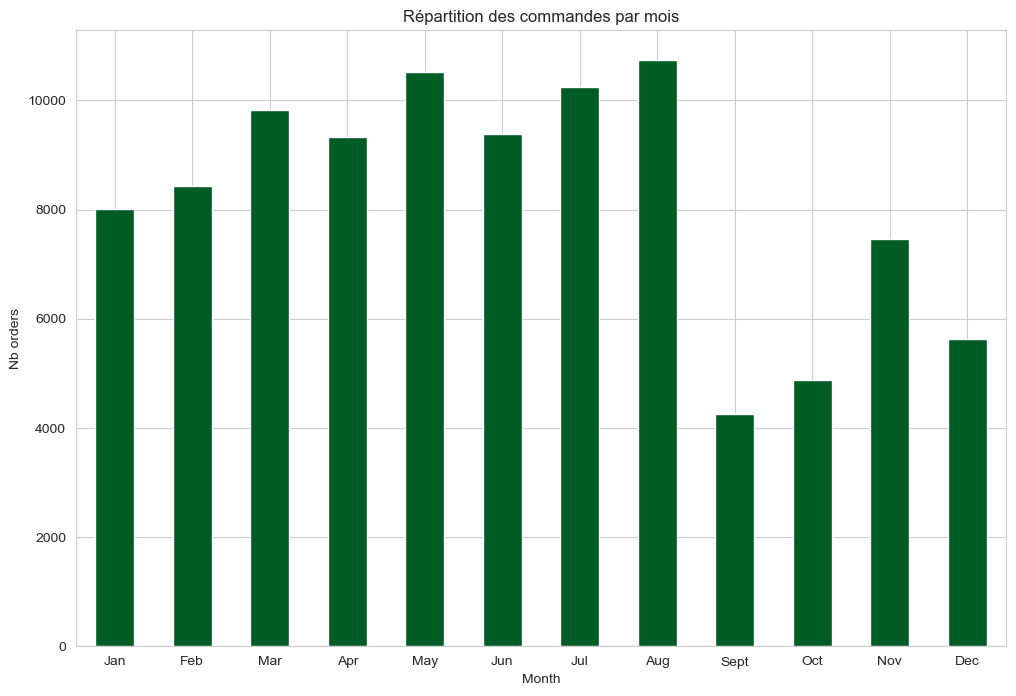

In [ ]:
order_items["order_purchase_timestamp"] = order_items["order_purchase_timestamp"].astype('datetime64[ns]')
monthly_orders = order_items.groupby(order_items['order_purchase_timestamp'].dt.month)\
                            .agg({"order_id": "nunique"})

# Définir une palette de couleurs personnalisée en vert avec une intensité croissante
colors = sns.color_palette("Greens_r", len(monthly_orders))

# Plot du graphique en barres
fig, ax = plt.subplots(figsize=(12,8))
monthly_orders.plot(kind="bar", color=colors, ax=ax,
                    title="Répartition des commandes par mois",
                    ylabel="Nb orders", xlabel="Month", legend=False)

# Axe
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'],
           rotation='horizontal')

# Afficher le plot
plt.show()

**Commentaire**
- Les mois demai et Aout sont les mois où les individus passe le plus grands nombre de commandes
- Aux mois de septembre, octobre et decembre par contre le volume de comande chutte

##### Analyse de la variabilité du Chiffre d'Affaires sur les mois de l'année

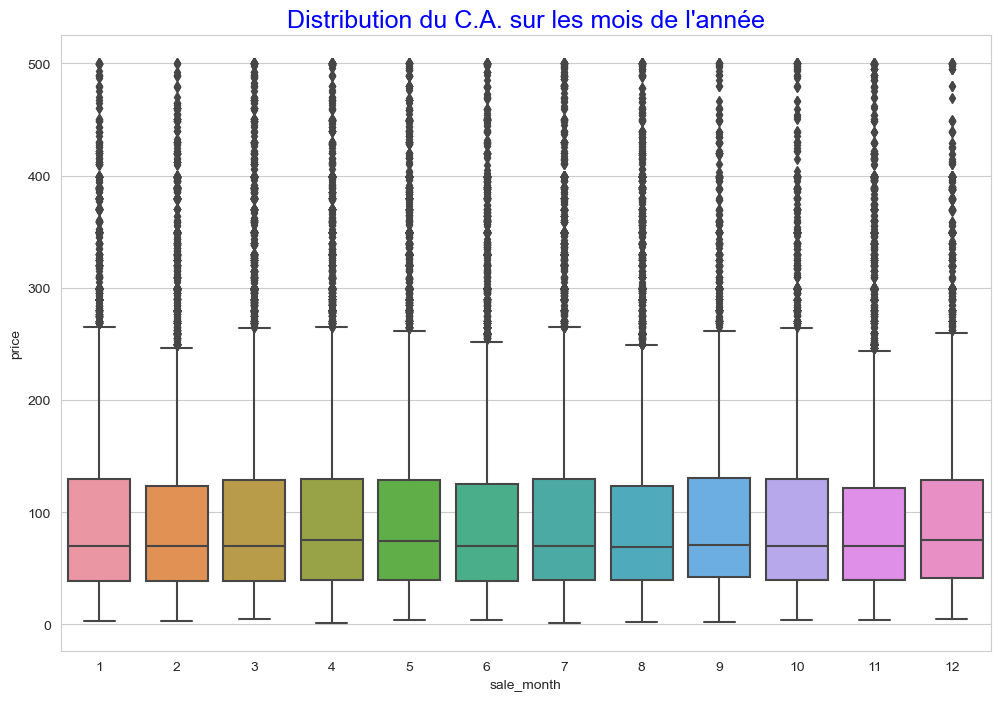

In [ ]:
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

Commentaires
Les médianes et variances restent très proches sur les différents mois de l'année.

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
4.1 Statistiques Multivariées
</h1>


#### Distribution des appreciation en fonction des RFMSCRORE

In [ ]:
# Boxplot de la moyenne de review_score par RFMScore
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned, x='RFMScore', y='mean_review_score')
plt.title('Comparaison de la satisfaction client (review_score) par RFMScore')
plt.xlabel('RFMScore')
plt.ylabel('Mean Review Score')
plt.show()

ValueError: Could not interpret input 'mean_review_score'

<Figure size 1200x800 with 0 Axes>

**Commentaire**
On constate que la dispersion des appreciation est faible à mesure que le RFMSCORE augmente

#### Apreciation moyenne des clients en fonction des états

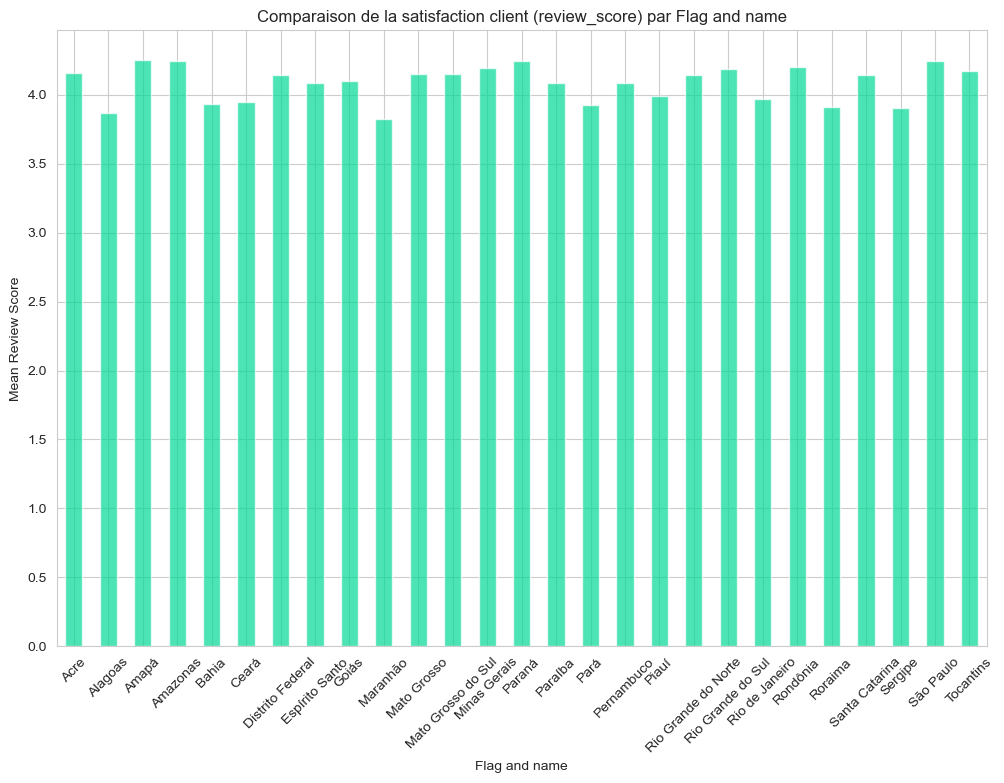

In [ ]:
# Calcul des proportions de mean_review_score par Flag and name
review_score_proportions = data_cleaned.groupby('Flag and name')['review_score'].mean()

# Barplot des moyennes de review_score par Flag and name
plt.figure(figsize=(12, 8))
review_score_proportions.plot(kind='bar', color='#00d994', alpha=0.7)
plt.title('Comparaison de la satisfaction client (review_score) par Flag and name')
plt.xlabel('Flag and name')
plt.ylabel('Mean Review Score')
plt.xticks(rotation=45)
plt.show()

**Commentaire:**
En moyenne, on a des appreciation supérieure à 3.5 dans chaque états

### RFMSCORE par rapport aux écarts de livraisons

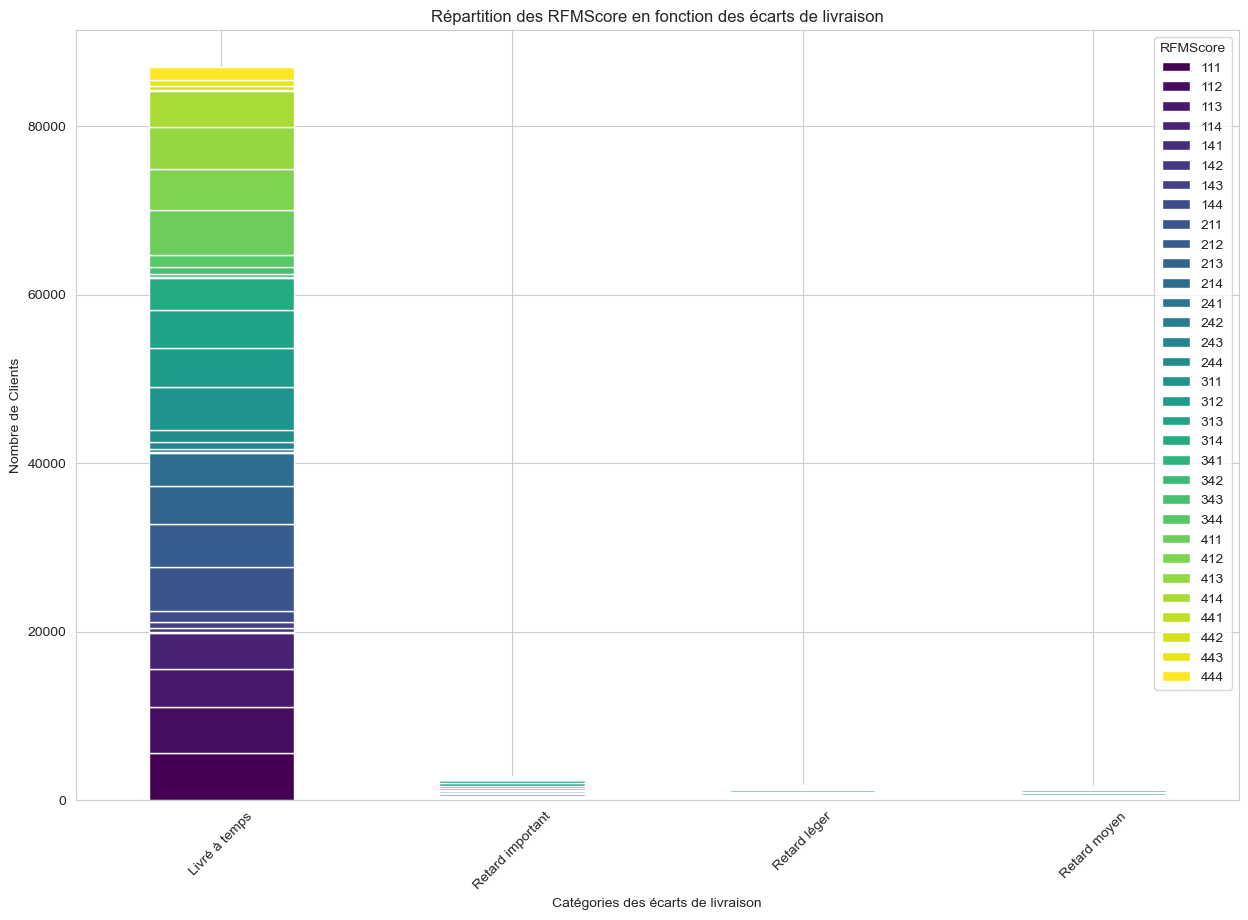

In [ ]:
# Créer des catégories pour les écarts de livraison
def categorize_delivery_delay(delay):
    if delay <= 0:
        return 'Livré à temps'
    elif delay <= 3:
        return 'Retard léger'
    elif delay <= 7:
        return 'Retard moyen'
    else:
        return 'Retard important'

data_cleaned['delivery_delay_category'] = data_cleaned['ecart_delivery_delay'].apply(categorize_delivery_delay)

# Calculer la répartition des RFMScore pour chaque catégorie d'écart de livraison
rfm_distribution_by_delay = data_cleaned.groupby(['delivery_delay_category', 'RFMScore']).size().unstack(fill_value=0)

# Tracer un graphique en barres empilées
rfm_distribution_by_delay.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Répartition des RFMScore en fonction des écarts de livraison')
plt.xlabel('Catégories des écarts de livraison')
plt.ylabel('Nombre de Clients')
plt.legend(title='RFMScore')
plt.xticks(rotation=45)
plt.show()


##### Analyse de la variabilité du Chiffre d'Affaires sur les mois de l'année

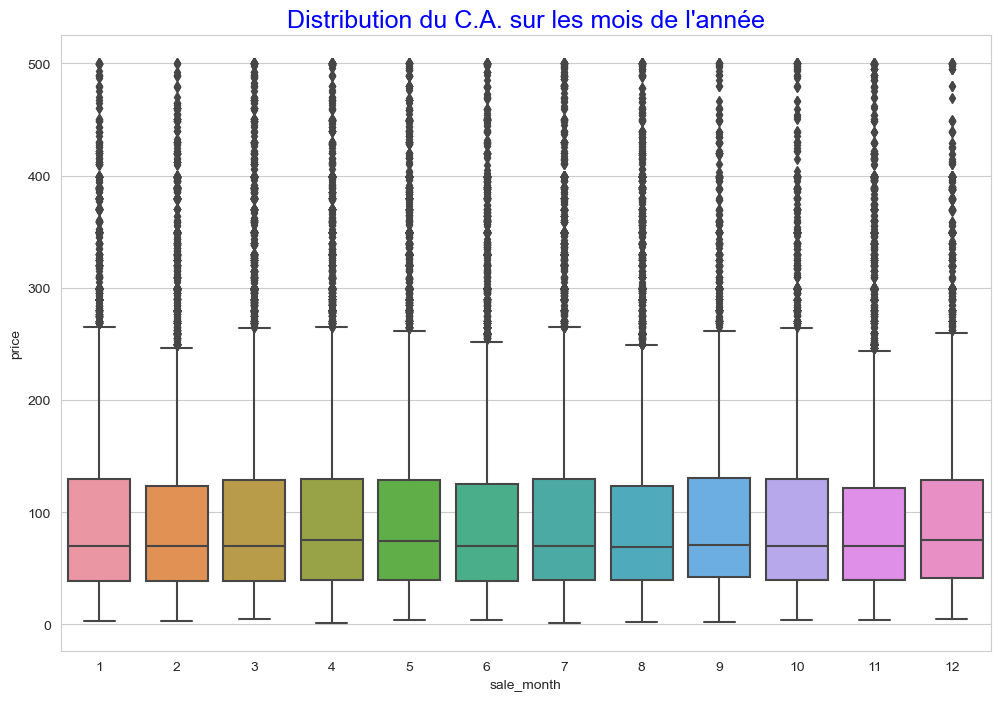

In [ ]:
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()



Commentaires
Les médianes et variances restent très proches sur les différents mois de l'année.